In [1]:
import torch
from timeit import timeit
from tqdm import trange
import matplotlib.pyplot as plt

In [2]:
a = torch.rand((7,7))
b = torch.rand((10_000_000,7))

In [3]:
%%timeit
x = torch.matmul(b, a.t())

40.3 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
a_cuda = a.cuda()
b_cuda = b.cuda()

In [5]:
%%timeit
x = torch.matmul(b_cuda, a_cuda.t())

86.9 µs ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
cpu_times = []
for num_particles_power in trange(3, 9):
    a = torch.rand((7,7))
    b = torch.rand((pow(10, num_particles_power),7))
    measurement = timeit(lambda: torch.matmul(b, a.t()), number=10)
    cpu_times.append(measurement)

gpu_times = []
for num_particles_power in trange(3, 9):
    a = torch.rand((7,7)).cuda()
    b = torch.rand((pow(10, num_particles_power),7)).cuda()
    measurement = timeit(lambda: torch.matmul(b, a.t()), number=10)
    gpu_times.append(measurement)

100%|██████████| 6/6 [00:03<00:00,  1.71it/s]


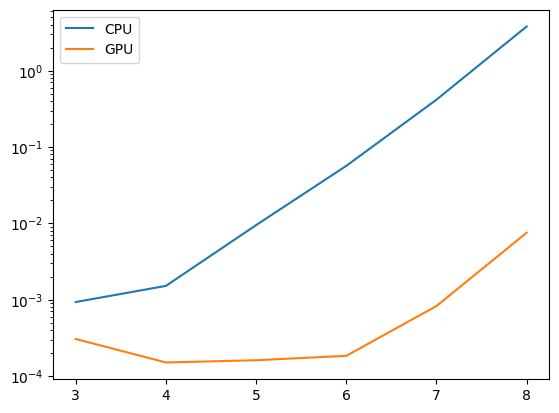

In [12]:
plt.plot(range(3, 9), cpu_times, label="CPU")
plt.plot(range(3, 9), gpu_times, label="GPU")
plt.yscale("log")
plt.legend()
plt.show()